<a href="https://colab.research.google.com/github/Nandika-22/Netflix-Classification-Project/blob/main/Smart_EDA_Assistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy seaborn matplotlib plotly scikit-learn fpdf openai


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from fpdf import FPDF
import warnings
warnings.filterwarnings('ignore')
print("All libraries imported successfully.")


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving smart eda.zip to smart eda.zip


In [ ]:
import zipfile, os, pandas as pd
with zipfile.ZipFile("smart eda.zip", "r") as zip_ref:
    zip_ref.extractall("extracted_data")
print("Extracted files:", os.listdir("extracted_data"))
df = pd.read_csv("extracted_data/shopping_trends_updated.csv")
print("Dataset Loaded Successfully!")
display(df.head())


Extracted files: ['shopping_trends_updated.csv', 'shopping_trends.csv']
Dataset Loaded Successfully!


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
print("🧾 Dataset Preview:")
display(df.head())
print("\n📊 Dataset Info:")
print(df.info())
print("\n🔍 Missing Values:")
print(df.isnull().sum())


🧾 Dataset Preview:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually



📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used        

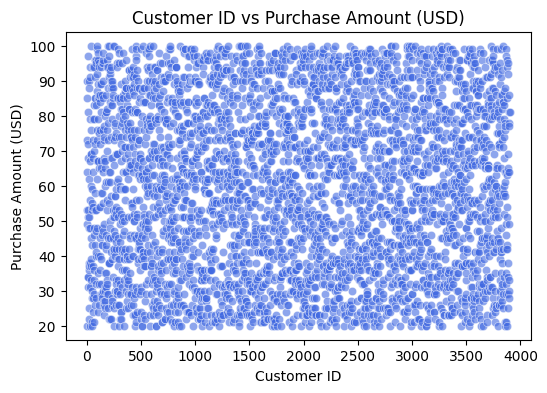

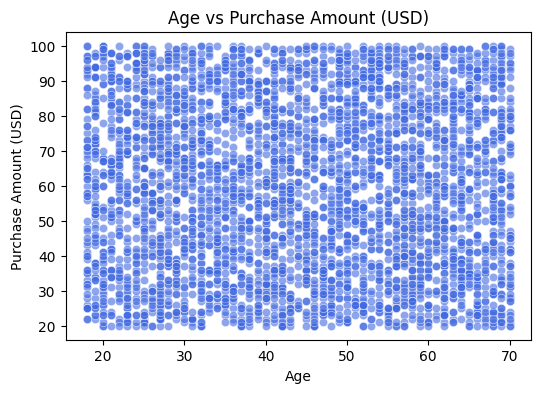

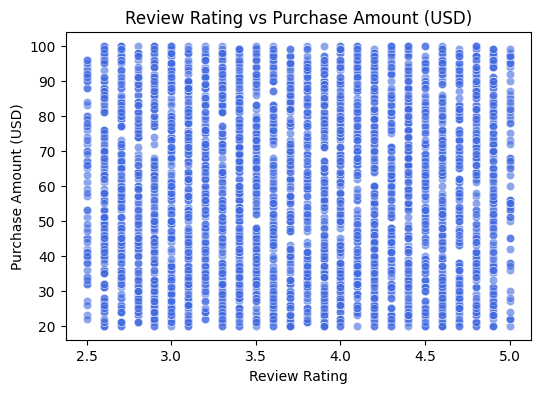

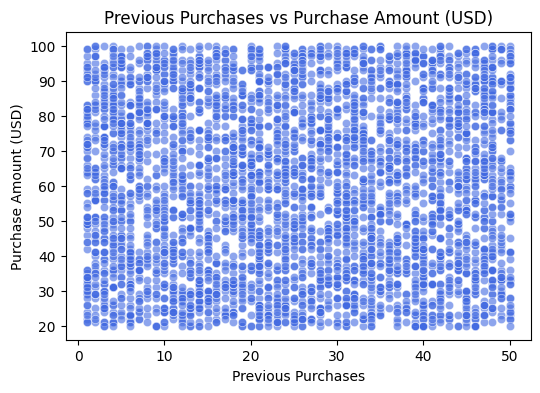

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
target_col = "Purchase Amount (USD)"
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    if col != target_col:
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=df, x=col, y=target_col, color='royalblue', alpha=0.6)
        plt.title(f"{col} vs {target_col}")
        plt.show()

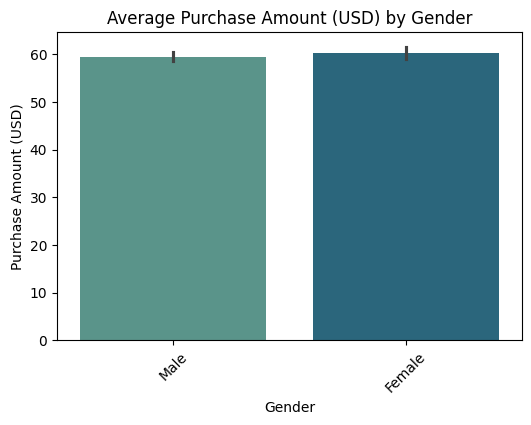

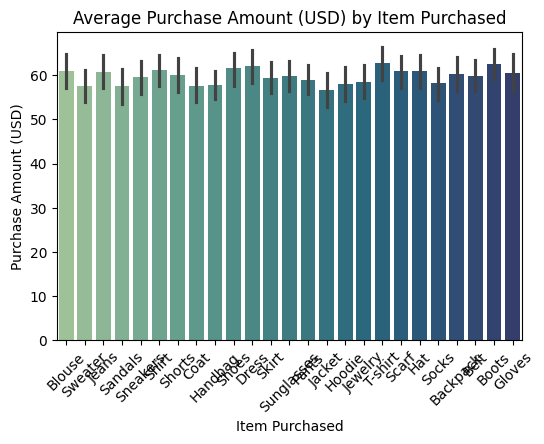

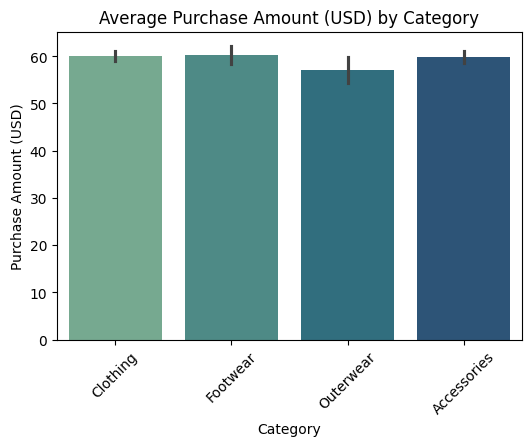

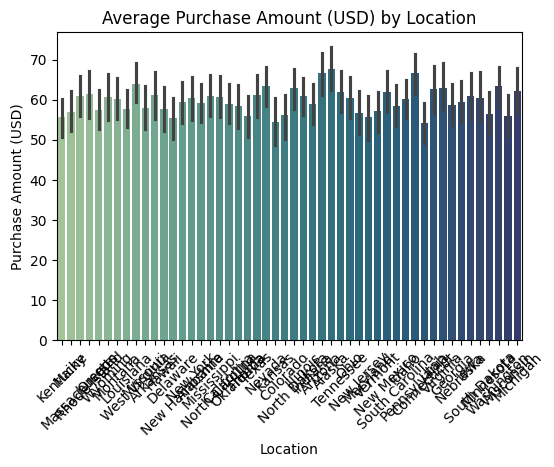

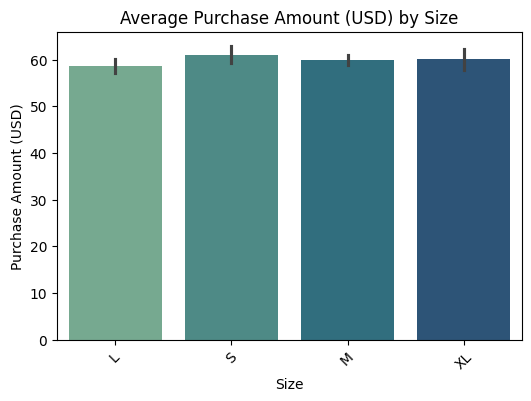

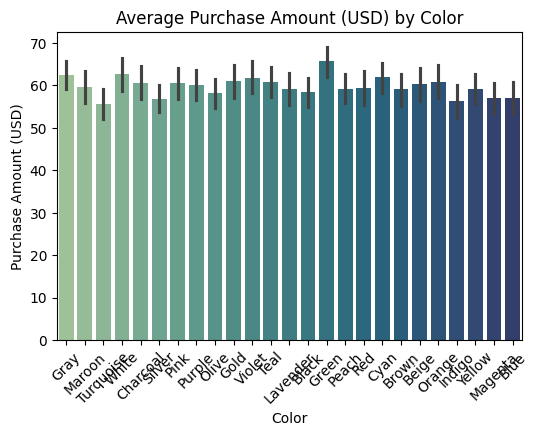

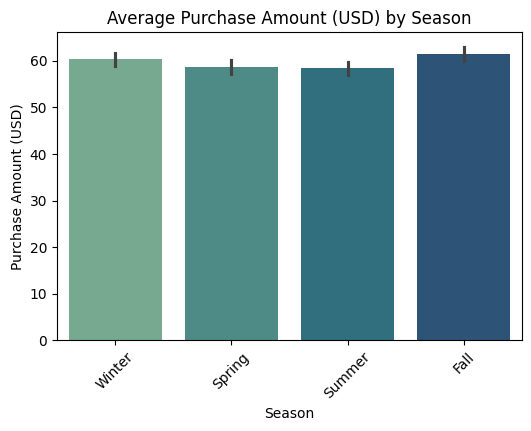

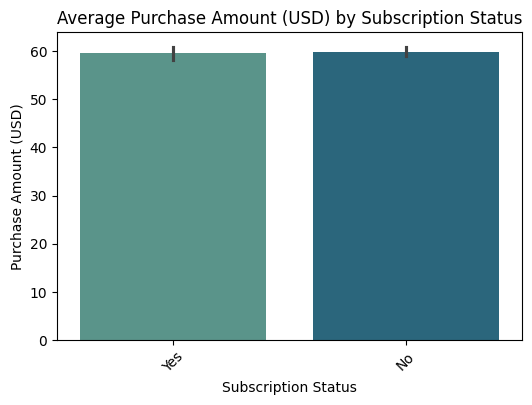

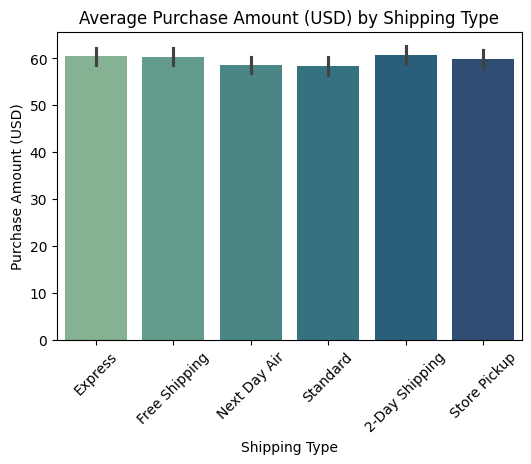

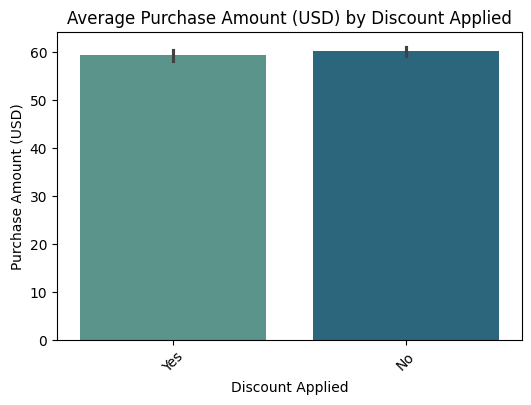

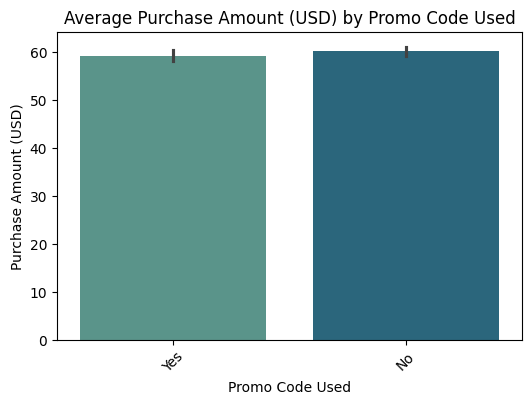

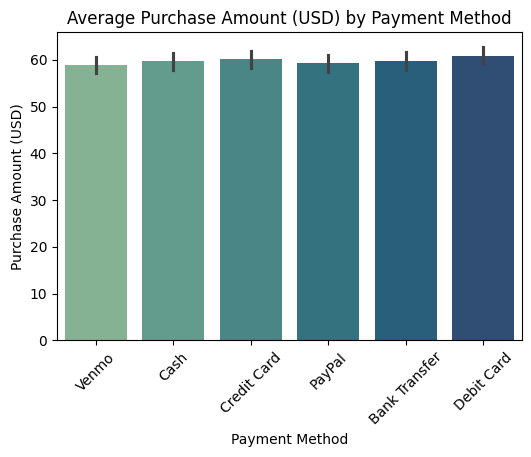

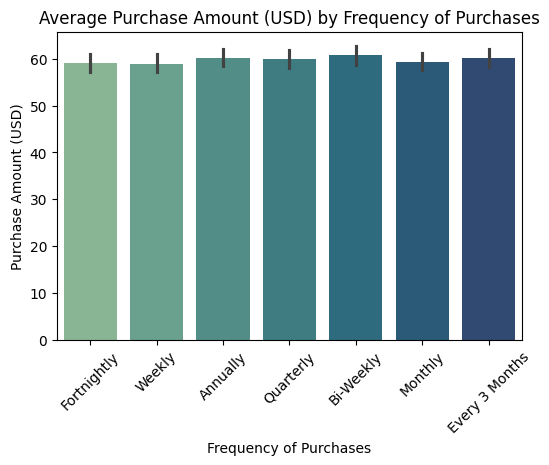

In [ ]:
# 2. Categorical Features vs Target
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(data=df, x=col, y=target_col, palette='crest')
    plt.title(f"Average {target_col} by {col}")
    plt.xticks(rotation=45)
    plt.show()


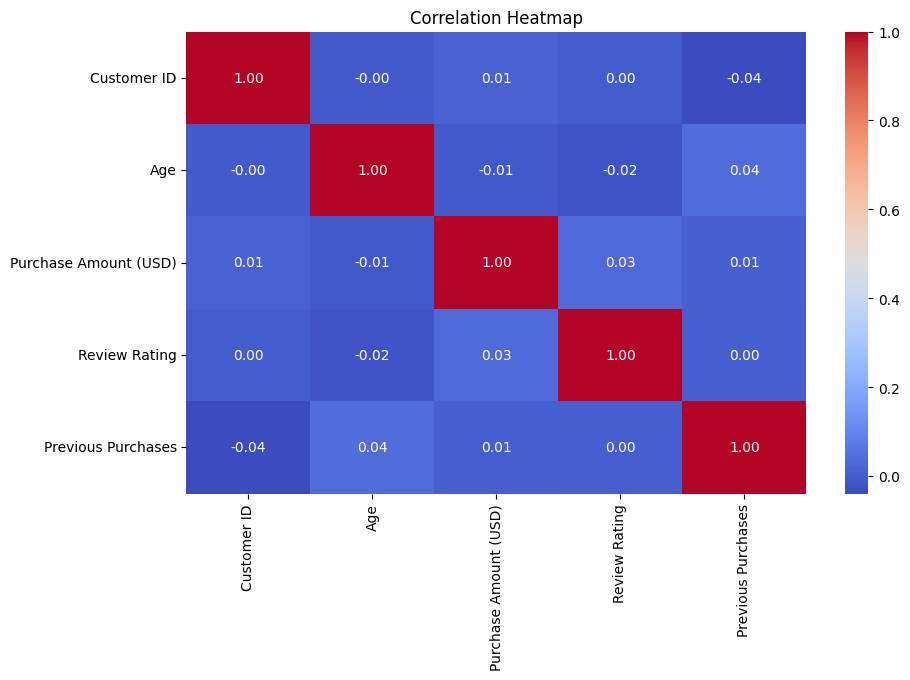

Highly Correlated Features:


""


In [ ]:
corr = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
high_corr = corr[(corr > 0.7) & (corr < 1)]
print("Highly Correlated Features:")
display(high_corr.dropna(how='all', axis=0).dropna(how='all', axis=1))


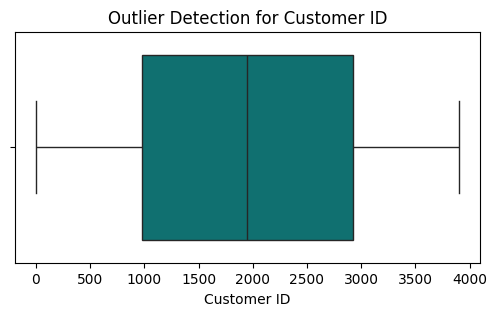

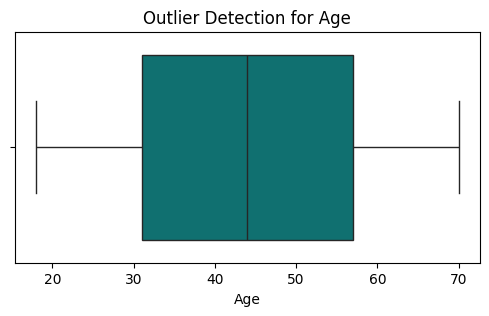

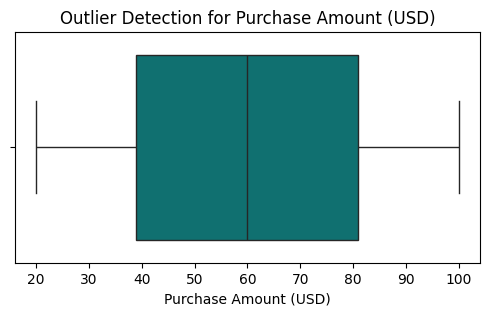

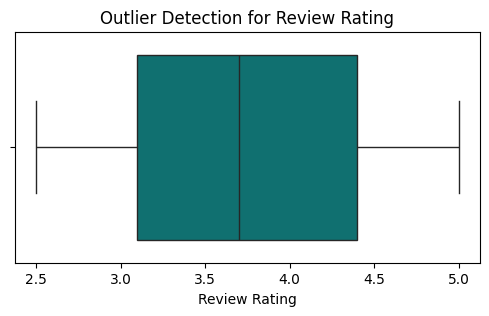

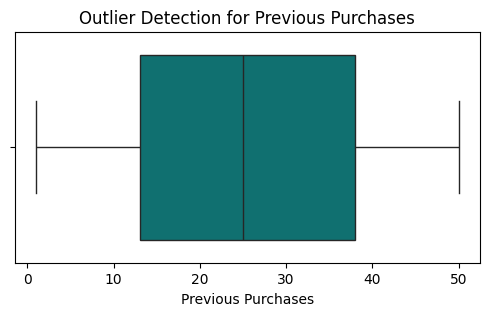

Outlier Summary:


,Outlier Count
Customer ID,0
Age,0
Purchase Amount (USD),0
Review Rating,0
Previous Purchases,0


In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df, x=col, color='teal')
    plt.title(f"Outlier Detection for {col}")
    plt.show()
def detect_outliers_iqr(df):
    outlier_summary = {}
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
        count = ((df[col] < lower) | (df[col] > upper)).sum()
        outlier_summary[col] = count
    return pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])
print("Outlier Summary:")
display(detect_outliers_iqr(df))
